In [1715]:
import os

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 800)

In [1716]:
data = pd.read_csv ("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understanding the data

In [1717]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1718]:
data.shape

(1460, 81)

In [1719]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [1720]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Understanding that there are some missing values**

In [1721]:
# columns having null values more than 40%
print (data.isnull().sum() [data.isnull().sum()/ len (data) * 100 > 40])
data = data.drop (data.isnull().sum() [data.isnull().sum()/ len (data) * 100 > 40].index, axis=1)

data.shape 

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


(1460, 75)

In [1722]:
data.isnull().sum() [data.isnull().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [1723]:
data ['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1724]:
#Let's fill null values with median
data ['LotFrontage'] = data ['LotFrontage'].fillna(data.LotFrontage.median())

In [1725]:
base_cols_nulls = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

data.dropna(subset=base_cols_nulls, inplace=True)

In [1726]:
data.shape

(1421, 75)

In [1727]:
gar_cols_nulls = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

data.dropna (subset=gar_cols_nulls, inplace=True)

In [1728]:
data.shape

(1347, 75)

In [1729]:
#Considering only one value missing, let's fill this up with most frequent one
data ['Electrical'] = data ['Electrical'].fillna ( data ['Electrical'].mode()[0] )

In [1730]:
#Filling missing values with median one for the columns - MasVnrArea as there are only little amount of missing values which can be bearable.
data ['MasVnrArea'] = data ['MasVnrArea'].fillna ( data ['MasVnrArea'].median() )

In [1731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotFrontage    1347 non-null   float64
 4   LotArea        1347 non-null   int64  
 5   Street         1347 non-null   object 
 6   LotShape       1347 non-null   object 
 7   LandContour    1347 non-null   object 
 8   Utilities      1347 non-null   object 
 9   LotConfig      1347 non-null   object 
 10  LandSlope      1347 non-null   object 
 11  Neighborhood   1347 non-null   object 
 12  Condition1     1347 non-null   object 
 13  Condition2     1347 non-null   object 
 14  BldgType       1347 non-null   object 
 15  HouseStyle     1347 non-null   object 
 16  OverallQual    1347 non-null   int64  
 17  OverallCond    1347 non-null   int64  
 18  YearBuilt    

### Data Processing

In [1732]:
data ['HouseAge'] = data ['YrSold'] - data ['YearBuilt']
data = data.drop ( ['YrSold', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'GarageYrBlt'], axis = 1 )

In [1733]:
#Dropping Id column as it's unique value to row identifier
data = data.drop ('Id', axis = 1)

In [1734]:
data.shape

(1347, 70)

In [1735]:
def univariate_graph (vari):
    plt.figure(figsize = (25,70)) 

    for key, val in enumerate (vari):
        plt.subplot (10, 4, key+1)
        sns.boxplot (x=val, y='SalePrice', data=data)
        plt.xticks (rotation=90)

    plt.show()

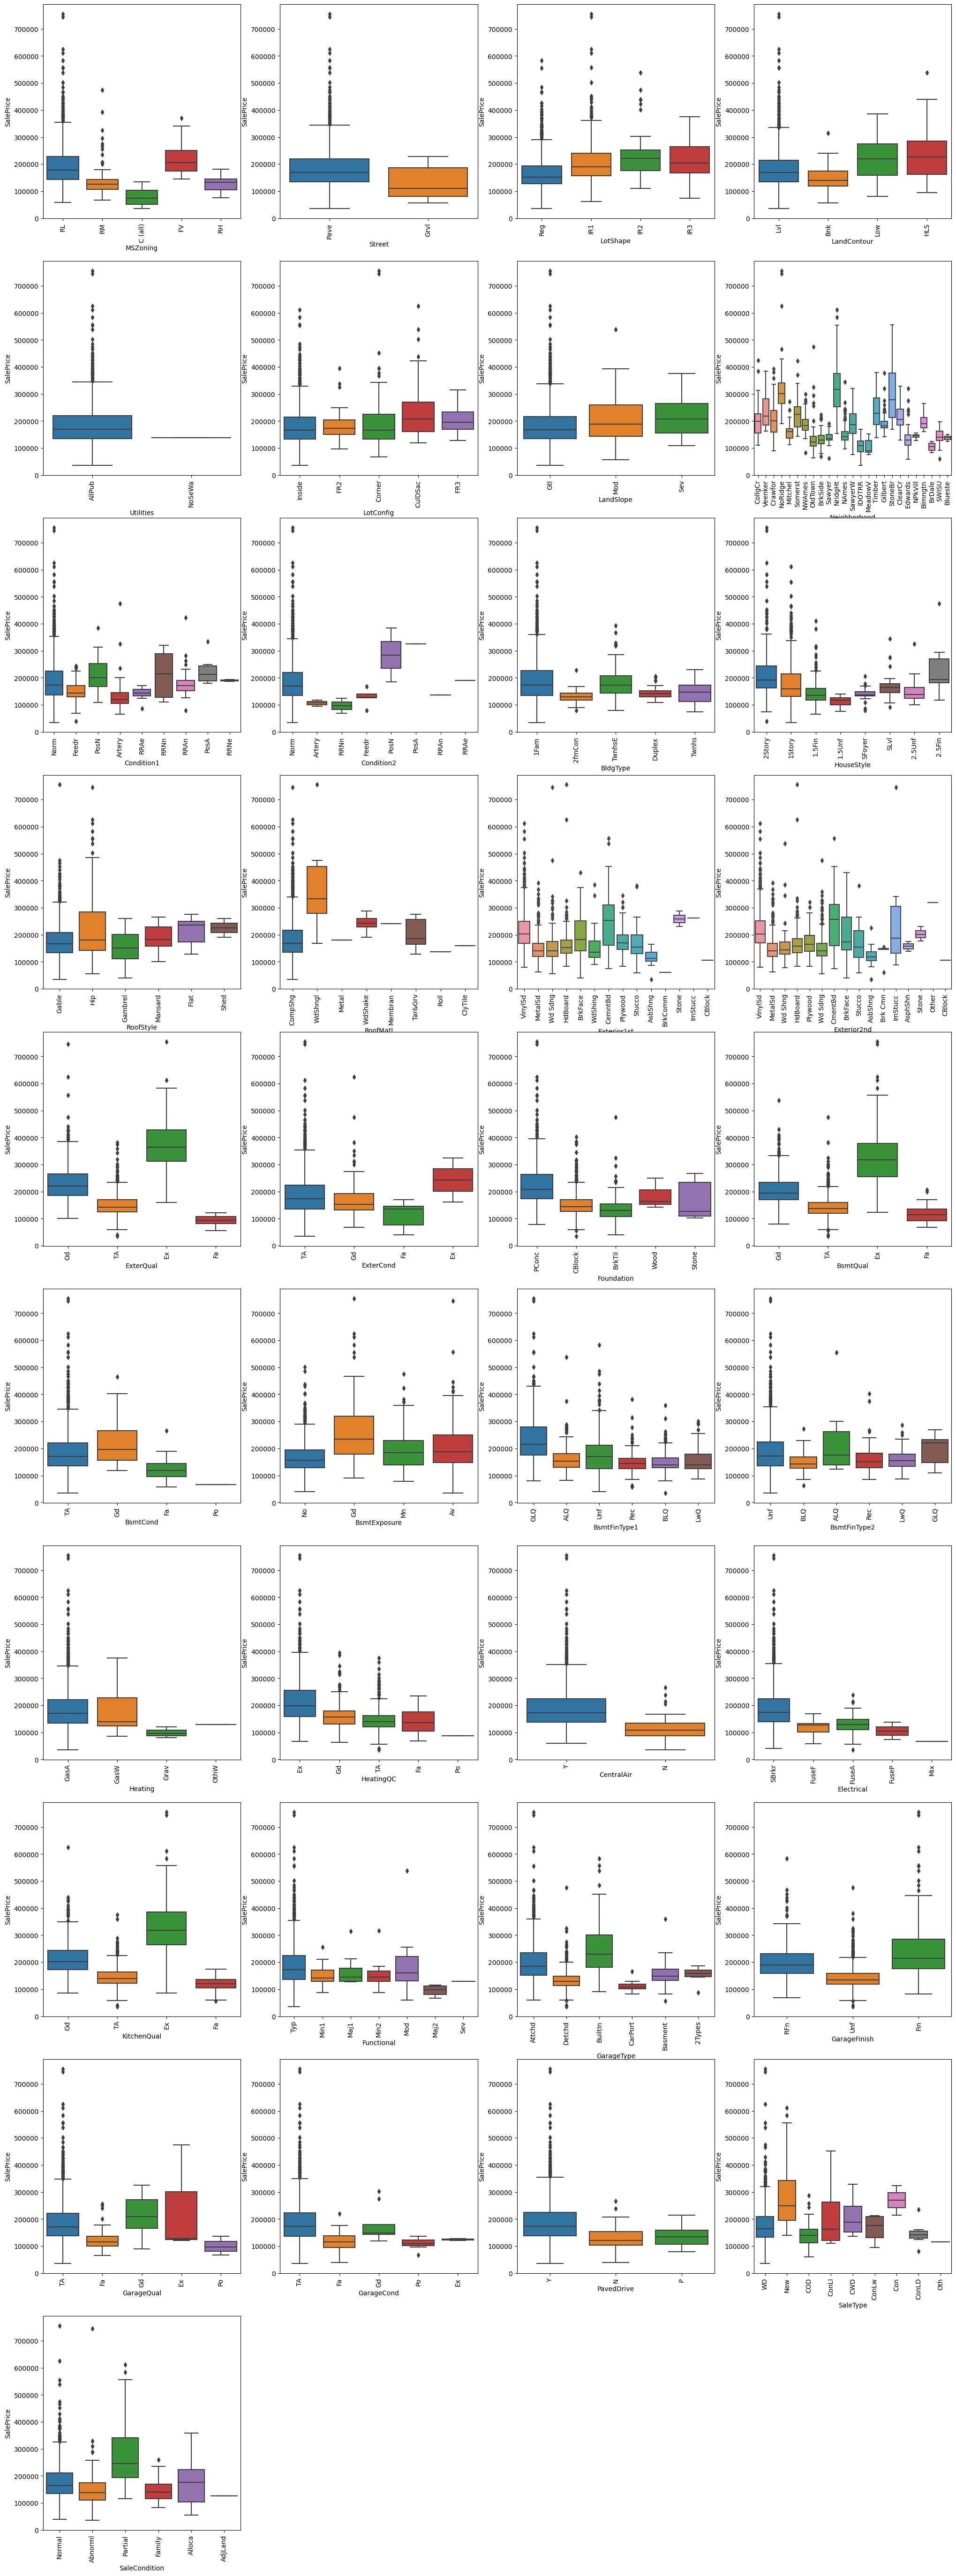

In [1736]:
cat_vars = data.select_dtypes ('object').columns
univariate_graph (cat_vars)

num_cols=data.select_dtypes('int64').columns

### Observations from Categorical Variables:<br>
<li>In MSZoning, The sales price was HIGH in type "FV" and C(all) has low</li>
<li>Street Pave had more sale price rather than GrvI</li>
<li>From the Utilities - AllPub has most of the sales</li>
<li>"PosN, Norm" from Condition2 columns has high sale price</li>
<li>RoofMarl - WdShngl has HIGH sale price</li>
<li>ExterQual - Ex has HIGH Sale Price</li>
<li>BsmtQual - Ex has HIGH sale price</li>
<li>Price from CentralAir is HIGH</li>
<li>KitchenQual - Ex has HIGH price</li>
<li>GarageQual - Ex has HIGH price</li>
<li>Sale price is HIGH when it's PavesDrive</li>
<li>Sale type "NEW" has HIGH sale price</li>
<li>SaleCondition - Partial has HIGH sale price</li>

In [1737]:
cont_vars = ['OverallQual', 'MSSubClass', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
             'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea']

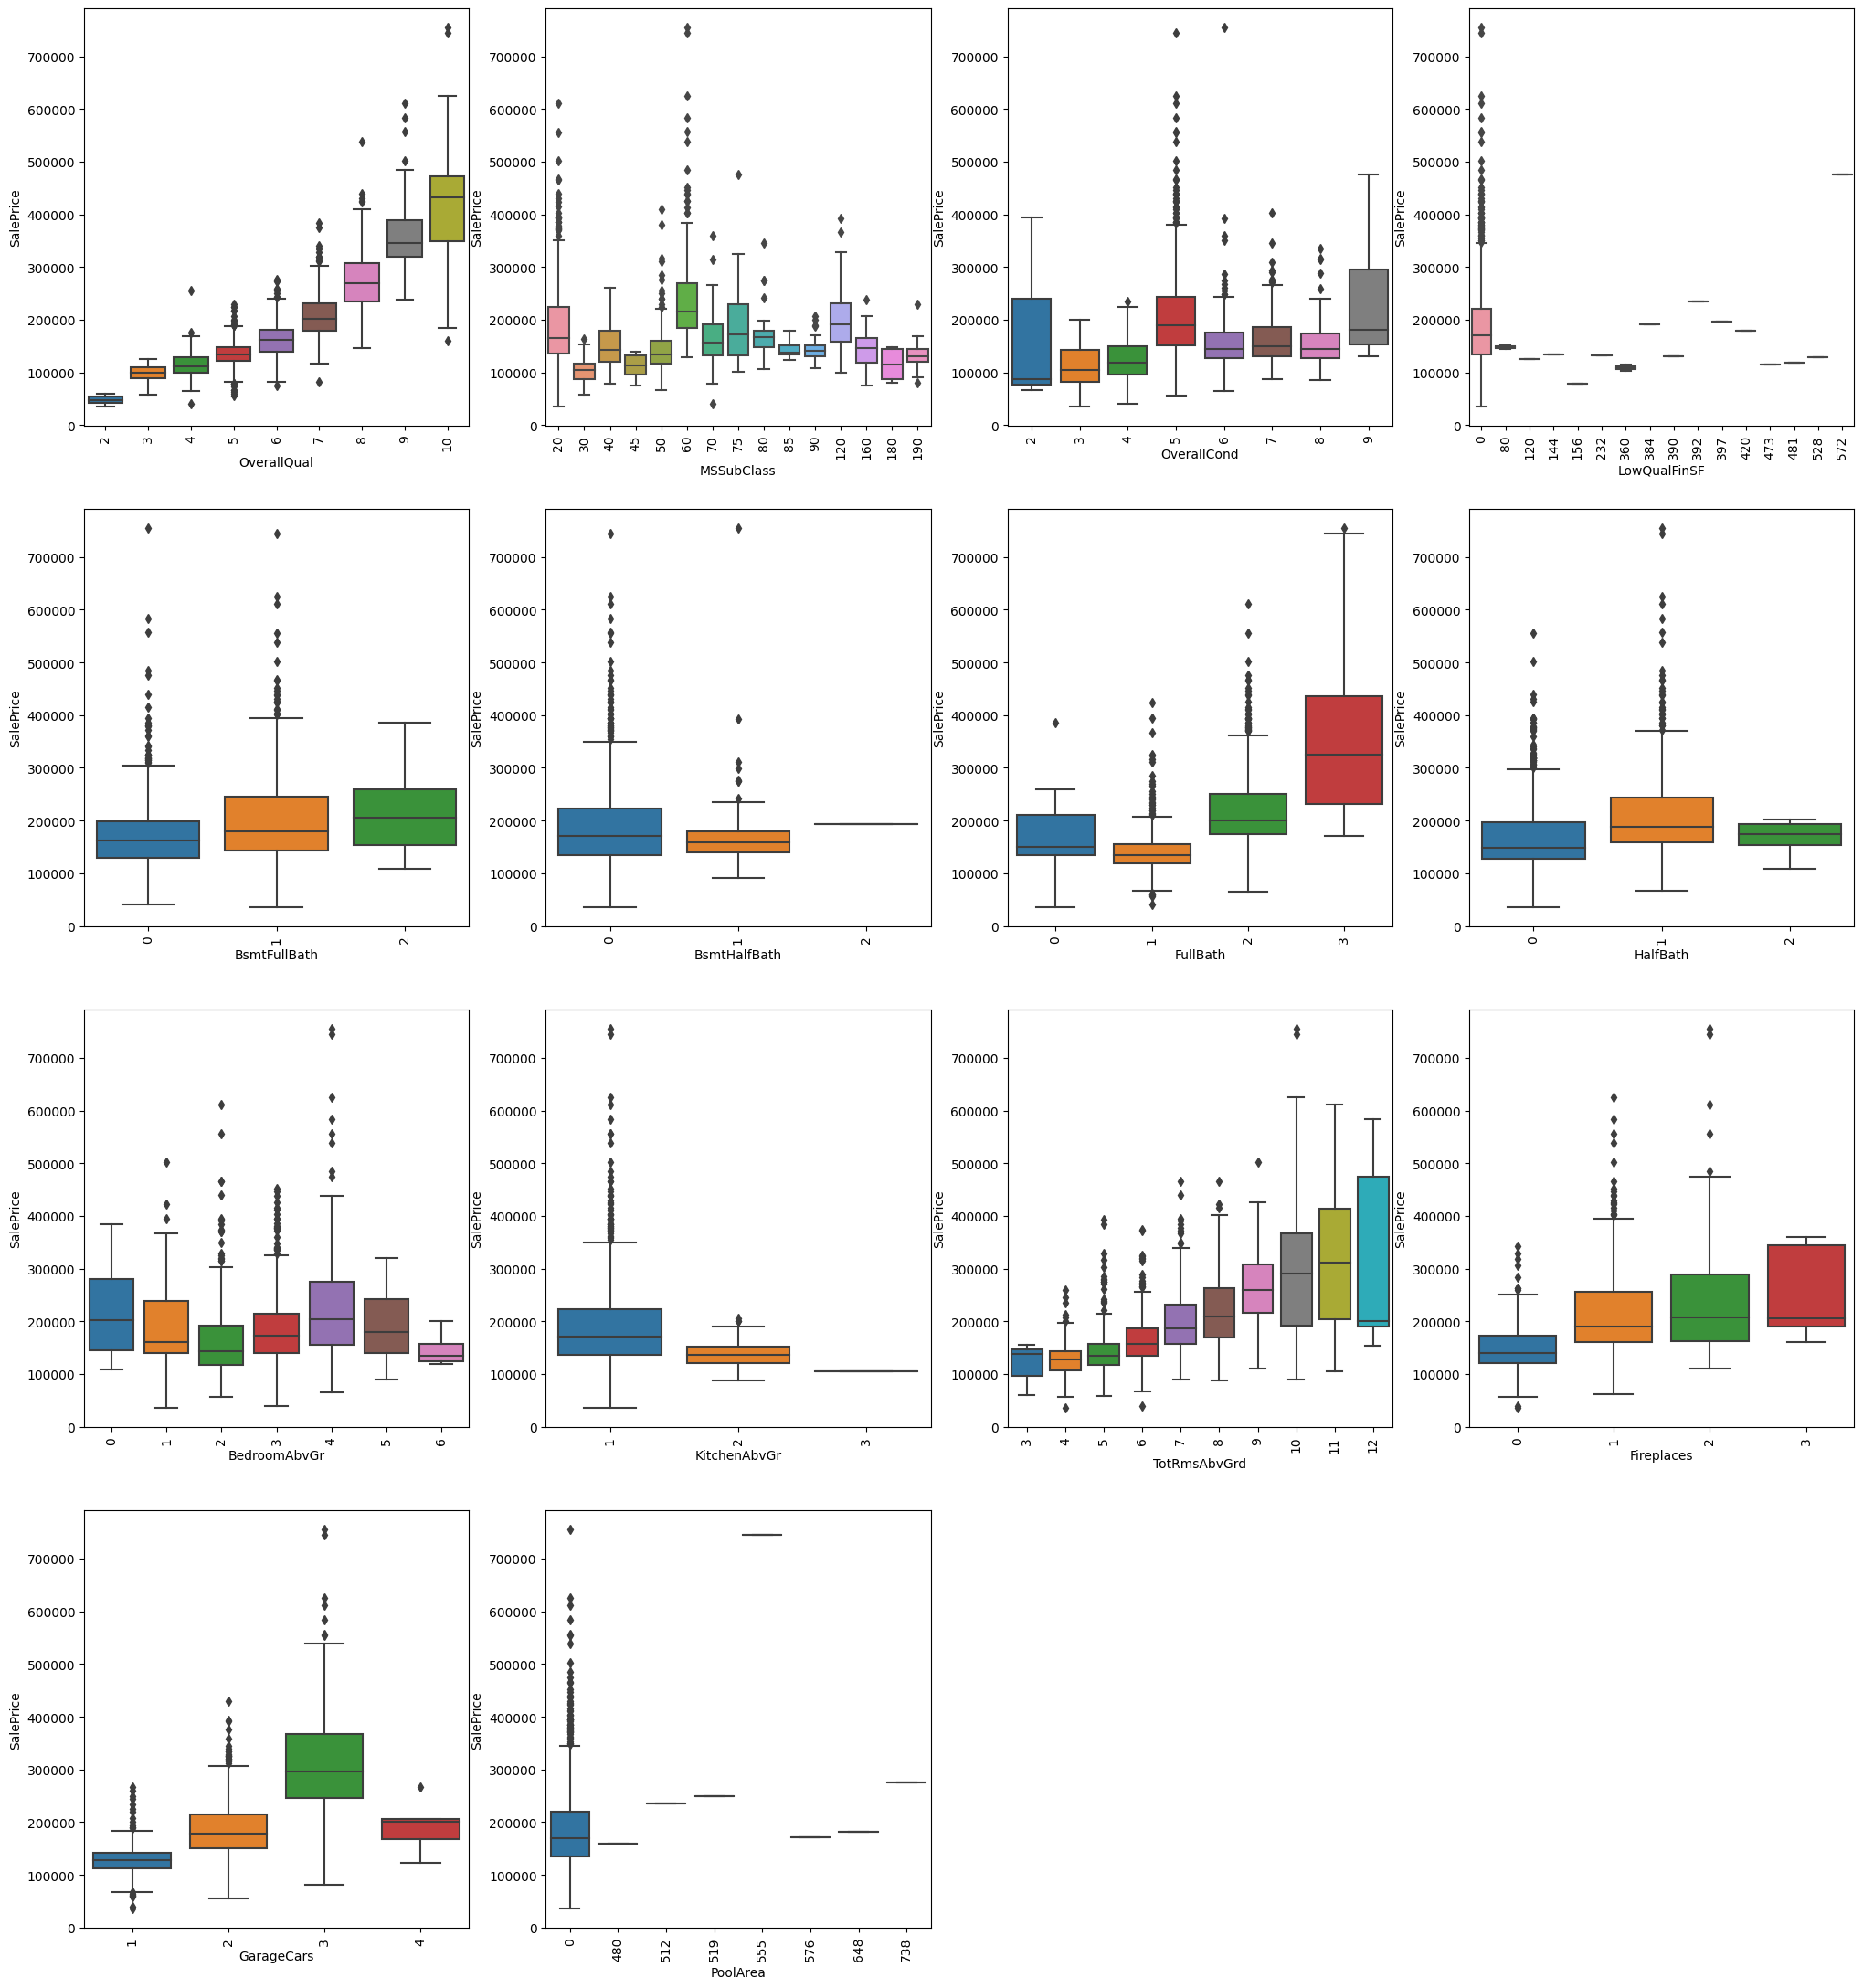

In [1738]:
univariate_graph (cont_vars)

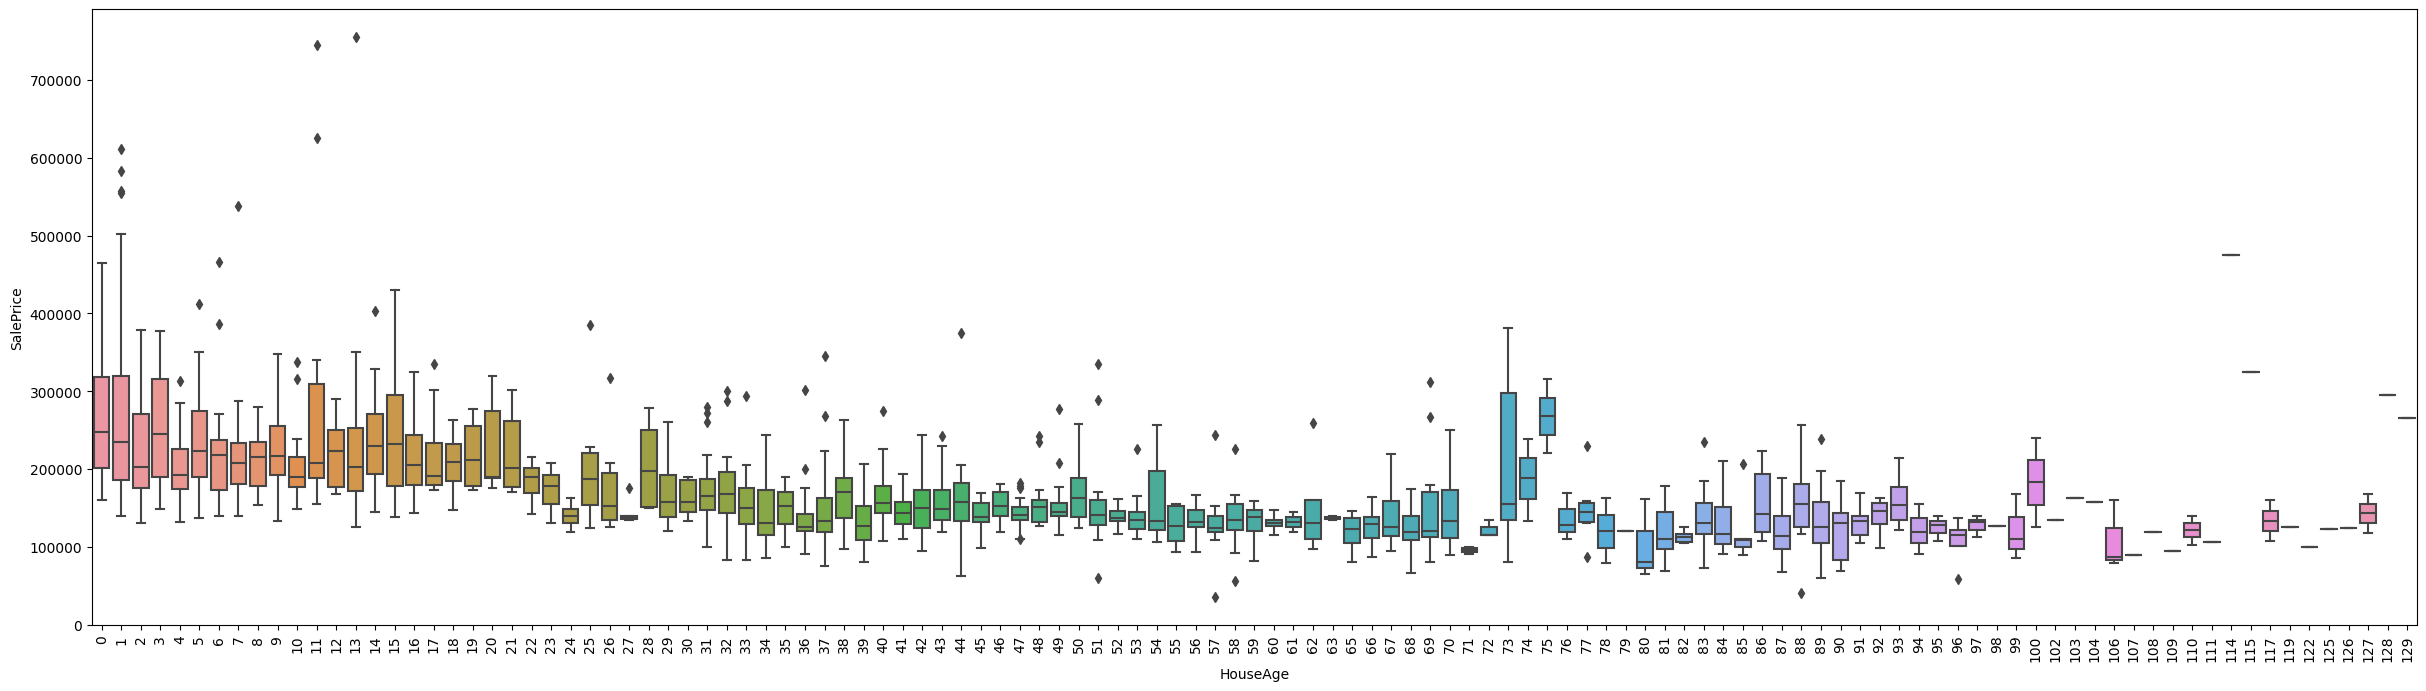

In [1739]:
plt.figure (figsize=(30, 8))
sns.boxplot (x = 'HouseAge', y = "SalePrice", data=data)
plt.xticks (rotation=90)
plt.show()

### Observations from Continuous Variables: <br>
<li>As Over all quality increases the sale price increase</li>
<li>MSSubClass - 60 and 20 has Little HIGH sale price compare to others</li>
<li>As Over all condition increases, Sale price increase, but compare to other ratings, 5 is also remarkable </li>
<li>LowQualFinSF - 0 has occupied most of the price ranges compare to others </li>
<li>BsmtHalfBath - 0 is notable </li>
<li>FullBath - 3 has HIGH sale price </li>
<li>HalfBath - 1 has HIGH sale price </li>
<li>KitchenAbvGr - 1 has HIGH sale price </li>
<li>As TotRmsAbvGrd increases, the sale price increase </li>
<li>GarageCars - 3 has HIGH sale price </li>
<li>PoolArea - 0 has HIGH sale price </li>
<li>HouseAge increases, the Saleprice decrease </li>

#### Data Preprocessing

Creating Dummy variables

In [1740]:
df_dummies = pd.get_dummies (data [cat_vars], drop_first=True).astype ('int')
data = data.drop (cat_vars, axis = 1)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [1741]:
data = pd.concat ([data, df_dummies], axis=1)

In [1742]:
data.shape

(1347, 221)

In [1743]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,96

#### Spliting Train and Test data

In [1744]:
X, y = train_test_split (data, train_size=0.7, random_state=100)

print (X.shape )
print (y.shape)

(942, 221)
(405, 221)


#### Re-Scaling the values

In [1745]:
scaler = MinMaxScaler()

X [num_cols] = scaler.fit_transform (X[num_cols] )
y [num_cols] = scaler.transform (y[num_cols] )

In [1746]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,0.235294,69.0,0.055523,0.625,0.428571,0.0,0.322124,0.000000,0.157106,0.319871,0.249636,0.603098,0.0,0.432555,0.5,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.333333,0.333333,0.357383,0.000000,0.073126,0.0,0.0,0.0,0.0,0.0,0.323319,0.109375,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0

In [1747]:
y.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,0.000000,69.0,0.053755,0.375,0.571429,0.0,0.326106,0.000000,0.074914,0.260743,0.157205,0.000000,0.0,0.102955,0.5,0.0,0.333333,0.0,0.333333,0.0,0.111111,0.000000,0.000000,0.157718,0.163361,0.000000,0.000000,0.0,0.366667,0.0,0.0,0.151022,0.359375,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,

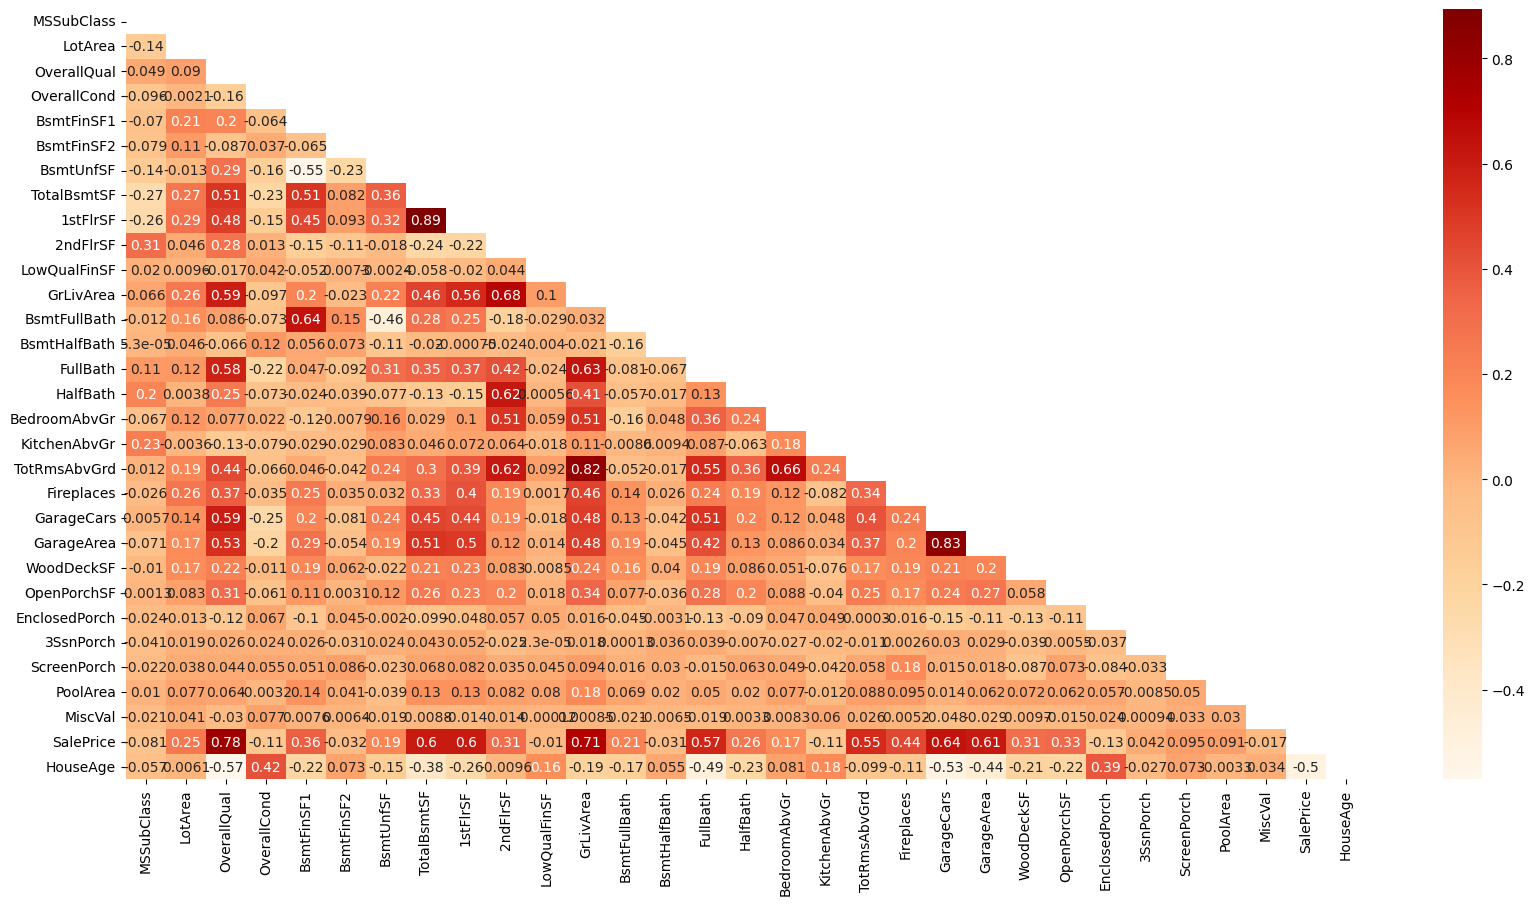

In [1748]:
plt.figure (figsize = (20, 10))
sns.heatmap (data[num_cols].corr(), cmap = 'OrRd', annot=True, mask = np.triu(data[num_cols].corr()))
plt.show()

#### Observations:
SalePrice has high correlation with 
<li>OverallQual</li>
<li>MasVnrArea</li>
<li>BsmtSF1</li>
<li>TotalBsmtSF</li>
<li>1stFlrSF</li>
<li>GrLivArea</li>
<li>FullBath</li>
<li>TotRmsAbvGrd</li>
<li>FirePlaces</li>
<li>GarageCars</li>
<li>GarageArea

In [1749]:
y_train = X.pop ('SalePrice')
X_train = X

y_test = y.pop ('SalePrice')
X_test = y

print ("Training set shape:")
print (y_train.shape)
print (X_train.shape)

print ("Training set shape:")
print (y_test.shape)
print (X_test.shape)

Training set shape:
(942,)
(942, 220)
Training set shape:
(405,)
(405, 220)


## Model Building

### Linear Regression Model

In [1750]:
lm = LinearRegression()
lm.fit (X_train, y_train)

LinearRegression()

#### RFE 
Find out optimum number of feature, let's take 70 as random

In [1751]:
rfe = RFE (lm, n_features_to_select=70)
rfe = rfe.fit (X_train, y_train)

list (zip (X_train, rfe.support_, rfe.ranking_))
rfe_incols = X_train.columns [rfe.support_]

In [1752]:
#let's filter the train and test set with selected columns

X_train = X_train [rfe_incols]
X_test = X_test [rfe_incols]

### Ridge Regression

In [1753]:
ridge = Ridge(alpha=0.001)
ridge.fit (X_train, y_train)

y_train_pred_ridge = ridge.predict (X_train)
y_test_pred_ridge = ridge.predict (X_test)

In [1754]:
print ("R2 Score for Train Set: ", r2_score (y_train,  y_train_pred_ridge))
print ("R2 Score for Test Set: ", r2_score (y_test,  y_test_pred_ridge))

R2 Score for Train Set:  0.91091224751493
R2 Score for Test Set:  0.7128593669112827


### GridSearchCV
Selecting the best value of alpha

In [1755]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0 ]}

ridge1 = Ridge()
folds = 5

ridge1 = GridSearchCV(estimator = ridge1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

ridge1.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   1.0, 2.0, 3.0, 4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1756]:
pd.DataFrame(ridge1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008699,0.001437,0.004828,0.003942,0.001,{'alpha': 0.001},-0.026318,-0.022017,-0.020900,-0.025402,-0.023666,-0.023660,0.002021,11,-0.019276,-0.020501,-0.020475,-0.019147,-0.020029,-0.019886,0.000577
1,0.011370,0.003973,0.005596,0.003286,0.01,{'alpha': 0.01},-0.026315,-0.021972,-0.020862,-0.025328,-0.023662,-0.023628,0.002025,10,-0.019280,-0.020520,-0.020511,-0.019151,-0.020052,-0.019903,0.000588
2,0.010148,0.003886,0.005761,0.003156,0.05,{'alpha': 0.05},-0.026299,-0.021856,-0.020787,-0.025049,-0.023634,-0.023525,0.002016,9,-0.019309,-0.020586,-0.020636,-0.019184,-0.020127,-0.019968,0.000617
3,0.011662,0.003866,0.005900,0.002684,0.1,{'alpha': 0.1},-0.026278,-0.021778,-0.020759,-0.024796,-0.023593,-0.023441,0.001993,7,-0.019353,-0.020651,-0.020750,-0.019243,-0.020197,-0.020039,0.000634
4,0.014730,0.003430,0.004826,0.003942,0.2,{'alpha': 0.2},-0.026251,-0.021694,-0.020722,-0.024494,-0.023665,-0.023365,0.001973,5,-0.019416,-0.020764,-0.020906,-0.019386,-0.020315,-0.020157,0.000648
5,0.014414,0.005995,0.004791,0.003912,0.3,{'alpha': 0.3},-0.026237,-0.021637,-0.020742,-0.024340,-0.023706,-0.023332,0.001958,4,-0.019458,-0.020858,-0.021038,-0.019531,-0.020401,-0.020257,0.000657
6,0.012815,0.003959,0.003211,0.003933,0.4,{'alpha': 0.4},-0.026220,-0.021606,-0.020750,-0.024234,-0.023726,-0.023307,0.001947,3,-0.019492,-0.020936,-0.021145,-0.019654,-0.020476,-0.020341,0.000665
7,0.012053,0.005117,0.003224,0.003949,0.5,{'alpha': 0.5},-0.026210,-0.021580,-0.020760,-0.024163,-0.023737,-0.023290,0.001940,2,-0.019529,-0.021003,-0.021241,-0.019770,-0.020541,-0.020417,0.000670
8,0.012978,0.006533,0.003757,0.003986,1.0,{'alpha': 1.0},-0.026302,-0.021510,-0.020774,-0.024091,-0.023714,-0.023278,0.001969,1,-0.019722,-0.021308,-0.021600,-0.020240,-0.020802,-0.020735,0.000686
9,0.012858,0.003873,0.003247,0.003978,2.0,{'alpha': 2.0},-0.026477,-0.021519,-0.020863,-0.024259,-0.023729,-0.023370,0.002014,6,-0.020074,-0.021777,-0.022168,-0.020870,-0.021204,-0.021219,0.000727


Let's choose the best value of alpha

In [1757]:
ridge1.best_params_

{'alpha': 1.0}

In [1758]:
ridge_a = Ridge(alpha = ridge1.best_params_['alpha'])
ridge_a.fit(X_train,y_train)

y_train_pred_ridge_a = ridge_a.predict (X_train)
y_test_pred_ridge_a = ridge_a.predict (X_test)

In [1759]:
print ("R2 Score for Train Set: ", r2_score (y_train,  y_train_pred_ridge_a))
print ("R2 Score for Test Set: ", r2_score (y_test,  y_test_pred_ridge_a))

R2 Score for Train Set:  0.90494225199659
R2 Score for Test Set:  0.7484947432661582


In [1784]:
ridge_ad = Ridge(alpha = 2.0)
ridge_ad.fit(X_train,y_train)

y_train_pred_ridge_ad = ridge_ad.predict (X_train)
y_test_pred_ridge_ad = ridge_ad.predict (X_test)

In [1785]:
print ("R2 Score for Train Set: ", r2_score (y_train,  y_train_pred_ridge_ad))
print ("R2 Score for Test Set: ", r2_score (y_test,  y_test_pred_ridge_ad))

R2 Score for Train Set:  0.9000160930089599
R2 Score for Test Set:  0.757646008412509


In [1760]:
model_parameter = list(ridge_a.coef_)
model_parameter.insert(0, ridge_a.intercept_)

cols = X.columns
cols.insert(0, 'constant')
ridge_a_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_a_coef.columns = ['Feaure','Coef']

In [1761]:
ridge_a_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,LotArea,0.118453
3,OverallQual,0.100772
10,1stFlrSF,0.090007
8,BsmtUnfSF,0.087335
12,LowQualFinSF,0.084642
37,LotShape_IR2,0.080750
5,MasVnrArea,0.079067
0,MSSubClass,0.069995
9,TotalBsmtSF,0.062229
16,FullBath,0.061996


## Error Distribution from Ridge Regression

Text(0.5, 1.0, 'Error disribution from Ridge')

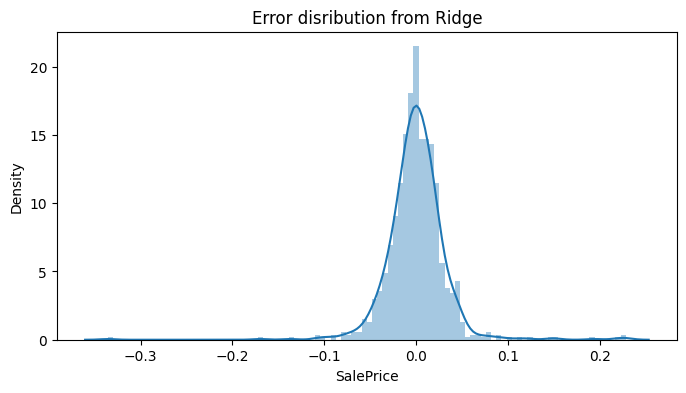

In [1777]:
plt.figure(figsize=(8,4))
sns.distplot((y_train - y_train_pred_ridge_a), bins = 100)
plt.title('Error disribution from Ridge')

## Lasso Regression

In [1762]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0 ]}

lasso = Lasso()
folds = 5

lasso1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

lasso1.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   1.0, 2.0, 3.0, 4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1763]:
pd.DataFrame(lasso1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010716,0.004687,0.002330,0.003189,0.001,{'alpha': 0.001},-0.031660,-0.025769,-0.025595,-0.030971,-0.026941,-0.028187,0.002605,1,-0.024982,-0.027785,-0.028500,-0.026813,-0.027264,-0.027069,0.001185
1,0.010029,0.004053,0.005077,0.004157,0.01,{'alpha': 0.01},-0.053422,-0.057748,-0.058314,-0.064545,-0.056404,-0.058087,0.003646,2,-0.058652,-0.057715,-0.058155,-0.056237,-0.057667,-0.057685,0.000807
2,0.006732,0.003389,0.005529,0.003271,0.05,{'alpha': 0.05},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
3,0.007890,0.000223,0.004833,0.003946,0.1,{'alpha': 0.1},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
4,0.009675,0.003149,0.004959,0.004051,0.2,{'alpha': 0.2},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
5,0.003190,0.003907,0.004910,0.004017,0.3,{'alpha': 0.3},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
6,0.005645,0.002974,0.002549,0.002940,0.4,{'alpha': 0.4},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
7,0.006791,0.003488,0.004808,0.003926,0.5,{'alpha': 0.5},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
8,0.009693,0.003159,0.006456,0.003229,1.0,{'alpha': 1.0},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506
9,0.009612,0.003197,0.004964,0.004065,2.0,{'alpha': 2.0},-0.076752,-0.075763,-0.077520,-0.084807,-0.073359,-0.077640,0.003848,3,-0.078131,-0.078011,-0.077956,-0.074467,-0.078639,-0.077440,0.001506


Let's select the best value of alpha

In [1764]:
print (lasso1.best_params_)

{'alpha': 0.001}


In [1765]:
lasso_a = Ridge(alpha = lasso1.best_params_['alpha'])
lasso_a.fit(X_train,y_train)

y_train_pred_lasso_a = lasso_a.predict (X_train)
y_test_pred_lasso_a = lasso_a.predict (X_test)

In [1766]:
print ("R2 Score for Train Set: ", r2_score (y_train,  y_train_pred_lasso_a))
print ("R2 Score for Test Set: ", r2_score (y_test,  y_test_pred_lasso_a))

R2 Score for Train Set:  0.91091224751493
R2 Score for Test Set:  0.7128593669112827


#### Let's double the alpha value

In [1782]:
lasso_ad = Ridge(alpha = 0.3)
lasso_ad.fit(X_train,y_train)

y_train_pred_lasso_ad = lasso_ad.predict (X_train)
y_test_pred_lasso_ad = lasso_ad.predict (X_test)

In [1783]:
print ("R2 Score for Train Set: ", r2_score (y_train,  y_train_pred_lasso_ad))
print ("R2 Score for Test Set: ", r2_score (y_test,  y_test_pred_lasso_ad))

R2 Score for Train Set:  0.9091923773870088
R2 Score for Test Set:  0.7333363640149806


In [1767]:
model_parameter_lasso = list(lasso_a.coef_)
model_parameter_lasso.insert(0, lasso_a.intercept_)

cols_lasso = X.columns
cols_lasso.insert(0, 'constant')
lasso_a_coef = pd.DataFrame(list(zip(cols_lasso, model_parameter_lasso)))
lasso_a_coef.columns = ['Feaure','Coef']

In [1768]:
lasso_a_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,LotArea,0.296062
32,MSZoning_FV,0.141669
10,1stFlrSF,0.104311
8,BsmtUnfSF,0.103543
3,OverallQual,0.097404
12,LowQualFinSF,0.091327
5,MasVnrArea,0.087479
20,TotRmsAbvGrd,0.074291
0,MSSubClass,0.069995
37,LotShape_IR2,0.068836


In [1792]:
model_parameter_lasso = list(lasso_a.coef_)
model_parameter_lasso.insert(0, lasso_a.intercept_)

cols_lasso = X.columns
cols_lasso.insert(0, 'constant')
lasso_ad_coef = pd.DataFrame(list(zip(cols_lasso, model_parameter_lasso)))
lasso_ad_coef.columns = ['Feaure','Coef']

lasso_ad_coef.sort_values(by='Coef',ascending=False)[5:10]

,Feaure,Coef
12,LowQualFinSF,0.091327
5,MasVnrArea,0.087479
20,TotRmsAbvGrd,0.074291
37,LotShape_IR2,0.068836
4,OverallCond,0.067529


## Error Distribution from Lasso Regression

Text(0.5, 1.0, 'Error disribution from Lasso')

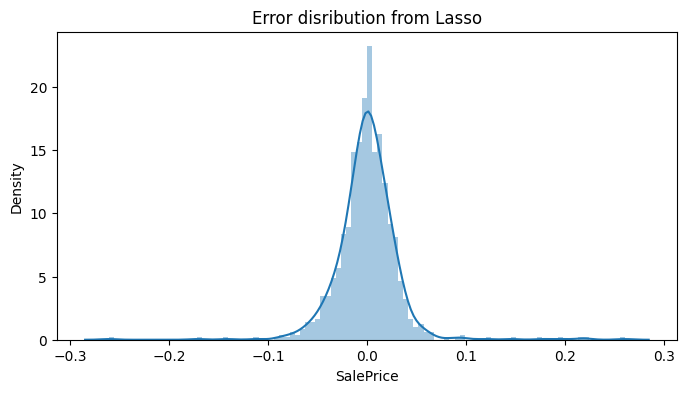

In [1776]:
plt.figure(figsize=(8,4))
sns.distplot((y_train - y_train_pred_lasso_a), bins = 100)
plt.title('Error disribution from Lasso')

## Conclusion:

`Combining both of the regression models (lasso, ridge)`:
- LotArea
- MSZoning
- 1stFlrSF
- BsmtUnfSF
- OverallQual
- LowQualFinSF

These features are the best variables that explains the SalePrice of the house. There are still more I have listed the top 6 variables only.<br>
So, The company can focus on these variables on priority.

**Best Alpha values:**
- Ridge: 1.0
- Lasso: 0.001

**R2 Scores:**


`Ridge Regression`
- Train: 0.904
- Test: 0.748

`Lasso Regression`
- Train: 0.910
- Test: 0.712